<a href="https://colab.research.google.com/github/reddykiran150/MachinelearningAssignment3/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded=files.upload()

Saving largeValidation.csv to largeValidation.csv


In [8]:
import pandas as pd


In [9]:
df =pd.read_csv('largeTrain.csv')
df1=pd.read_csv('largeValidation.csv')
print(df)
print(df1)

      6  0  0.1  0.2  0.3  0.4  0.5  ...  0.92  0.93  0.94  0.95  0.96  0.97  0.98
0     6  0    0    0    0    0    0  ...     0     0     0     0     0     0     0
1     0  0    0    0    0    0    0  ...     0     0     0     0     0     0     0
2     3  0    0    0    0    0    0  ...     1     0     0     0     0     0     0
3     0  0    0    0    0    0    0  ...     0     0     0     0     0     0     0
4     7  0    0    0    0    0    0  ...     0     0     0     0     0     0     0
...  .. ..  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   ...
8994  4  1    0    0    0    0    0  ...     0     0     0     0     0     1     1
8995  2  0    0    1    1    1    1  ...     1     1     1     1     1     0     0
8996  8  0    0    0    0    1    0  ...     0     0     0     1     1     0     0
8997  1  0    0    0    0    0    0  ...     0     0     0     0     0     0     0
8998  5  0    0    0    0    0    0  ...     0     0     0     0     0     0     0

[89

In [10]:
import numpy as np

In [12]:
fdtr=df.to_numpy()
fdtest=df1.to_numpy()
ytrain=np.array(fdtr.T[0])
ytest=np.array(fdtest.T[0])


In [13]:
print(ytrain)

[6 0 3 ... 8 1 5]


In [14]:
xtrain=np.delete(fdtr,0,1)
xtest=np.delete(fdtest,0,1)


In [15]:
print(xtest)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
import torch

In [17]:
unique,counts=np.unique(ytrain,return_counts=True)
print(dict(zip(unique,counts)))

{0: 900, 1: 900, 2: 900, 3: 900, 4: 900, 5: 900, 6: 899, 7: 900, 8: 900, 9: 900}


In [31]:
from torch import nn
import torch.nn.functional as F
class simplenet(nn.Module):
  def __init__(self,input_size,hidden_size,num_outputs):
    super(simplenet,self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.linear2=nn.Linear(hidden_size,num_outputs)
  
  def forward(self,X):
    a1=F.relu(self.linear1(X))
    a2=self.linear2(a1)
    return a2


In [82]:
from torch import optim
model = simplenet(128,100,10)
loss_func = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(),lr=0.1)

In [52]:

xtrain=xtrain.type(torch.LongTensor)
ytrain=ytrain.type(torch.LongTensor)
xtest=xtest.type(torch.LongTensor)
ytest=ytest.type(torch.LongTensor)

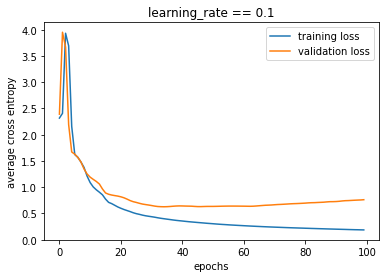

In [83]:
## training part
import matplotlib.pyplot as plt
model.train()
trian_loss=[]
valid=[]
for epochs in range(100):
  model.train()
  optimiser.zero_grad()
  output=model(xtrain.float())
  loss=loss_func(output,ytrain)
  trian_loss.append(loss.item())
  loss.backward()
  optimiser.step()
  model.eval()
  out1=model(xtest.float())
  loss1=loss_func(out1,ytest)
  valid.append(loss1.item())
plt.plot(np.arange(100),trian_loss)
plt.plot(np.arange(100),valid)
plt.legend(["training loss","validation loss"])
plt.title('learning_rate == 0.1')
plt.xlabel('epochs')
plt.ylabel('average cross entropy')
plt.show()

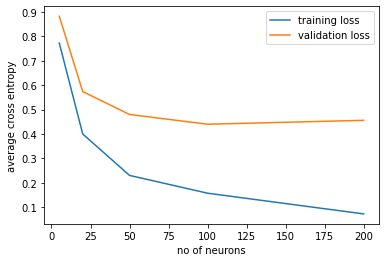

In [85]:
arr=[5,20,50,100,200]
arrtrain=[0.773,0.400,0.23,0.157,0.072]
arrvalid=[0.883,0.574,0.48,0.44,0.456]
plt.plot(arr,arrtrain)
plt.plot(arr,arrvalid)
plt.xlabel("no of neurons")
plt.ylabel("average cross entropy")
plt.legend(["training loss","validation loss"])
plt.show()